# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Andhika Ahnaf Daniswara
- **Email:** ahnaf.andhika@gmail.com
- **ID Dicoding:** xpal197320

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan per bulan dan revenue perusahaan ?
- Bulan mana yang menunjukkan performa penjulaan tertinggi dan terendah ?
- Kategori produk yang paling diminati dan kurang diminati ?
- Menentukan pelanggan terbaik berdasarkan parameter rfm ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Insight:**
- xxx
- xxx

In [2]:
customers_df=pd.read_csv('olist_customers_dataset.csv')
geolocation_df=pd.read_csv('olist_geolocation_dataset.csv')
products_df=pd.read_csv('olist_products_dataset.csv')
categories_df=pd.read_csv('product_category_name_translation.csv')
payments_df=pd.read_csv('olist_order_payments_dataset.csv')
orders_df=pd.read_csv('olist_orders_dataset.csv')
reviews_df=pd.read_csv('olist_order_reviews_dataset.csv')
sellers_df=pd.read_csv('olist_sellers_dataset.csv')
items_df=pd.read_csv('olist_order_items_dataset.csv')

In [3]:
print(customers_df.shape)
customers_df.head()

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
print(geolocation_df.shape)
geolocation_df.head()

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
print(products_df.shape)
products_df.head()

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
print(categories_df.shape)
categories_df.head()

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [7]:
print(payments_df.shape)
payments_df.head()

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
print(orders_df.shape)
orders_df.head()

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
print(reviews_df.shape)
reviews_df.head()

(99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
print(sellers_df.shape)
sellers_df.head()

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
print(items_df.shape)
items_df.head()

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Assessing Data

Mengidentifikasi dan memperbaiki tipe data yang tidak sesuai, missing value, duplikat data


#### Mengevaluasi data customers_df

In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [14]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


#### Mengevaluasi data orders_df

In [15]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat kesalahan tipe data string pada kolom order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date. harusnya bertipe date

In [16]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Terdapat missing value pada kolom order_approved_at,
order_delivered_carrier_date,
order_delivered_customer_date. Namun, hal ini tidak perlu diperbaiki karena kolom tersebut tidak digunakan dalam analisis ini


In [17]:
print("jumlah duplikasi: ", orders_df.duplicated().sum())

jumlah duplikasi:  0


#### Mengevaluasi data items_df

In [18]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Terdapat kesalahan tipe data string pada kolom shipping_limit_date, harusnya bertipe data date




In [19]:
items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [20]:
print("Jumlah duplikasi: ", items_df.duplicated().sum())
items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [21]:
items_df[items_df['freight_value'] == items_df.freight_value.min()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
114,00404fa7a687c8c44ca69d42695aae73,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-15 04:31:26,99.9,0.0
258,00a870c6c06346e85335524935c600c0,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-14 00:14:29,69.9,0.0
483,011c899816ea29773525bd3322dbb6aa,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-07 05:30:45,99.9,0.0
508,012b3f6ab7776a8ab3443a4ad7bef2e6,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0
509,012b3f6ab7776a8ab3443a4ad7bef2e6,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0
...,...,...,...,...,...,...,...
111094,fc698f330ec7fb74859071cc6cb29772,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-04-25 02:31:57,53.9,0.0
111497,fd4907109f6bac23f07064af84bec02d,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-04-30 11:31:32,219.0,0.0
111649,fd95e4b85ebbb81853d4a6be3d61432b,1,53b36df67ebb7c41585e8d54d6772e08,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 11:10:31,106.9,0.0
112182,fee19a0dc7358b6962a611cecf6a37b4,1,f1c7f353075ce59d8a6f3cf58f419c9c,37be5a7c751166fbc5f8ccba4119e043,2017-09-07 22:06:31,195.0,0.0


Sepertinya ada keanehan pada nilai minimal freight value sebesar 0, tapi setelah saya cek jumlah order yang memiliki freight value 0 sebanyak 383 data, jadi besar kemungkinan tersebut bukan merupakan inacurrate value. kemungkinan karena adanya promo gratis ongkir.

#### Mengevaluasi data categories_df

In [22]:
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [23]:
categories_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [24]:
categories_df.duplicated().sum()

0

#### Mengevaluasi data products_df

In [25]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [26]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Menggabungkan data products_df dengan data translation dalam bahasa inggris

In [27]:
product = products_df.merge(categories_df, on ='product_category_name', how='left')
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [28]:
products_df = product[["product_id","product_category_name_english","product_category_name"]]
products_df.isna().sum()

,0
product_id,0
product_category_name_english,623
product_category_name,610


Setelah digabung dengan product_category_name_english terdapat selisih 13 missing value, hal ini mungkin terjadi karena terdapat product baru yang data product_category_name_english masih belum diperbarui

In [29]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

#### Cleaning orders_df

Mengubah tipe data

In [30]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in date_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [31]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Cleaning items_df

Mengubah tipe data

In [32]:
items_df['shipping_limit_date'] = pd.to_datetime(items_df['shipping_limit_date'])

In [33]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Cleaning products_df

Menangani Missing Value

In [34]:
x = products_df.loc[products_df["product_category_name"].notnull() & products_df["product_category_name_english"].isnull()]
set(x["product_category_name"])

{'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'}

In [35]:
products_df.fillna(value= 'unknown', inplace= True)

<ipython-input-35-4e44afa5d383>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df.fillna(value= 'unknown', inplace= True)


In [36]:
products_df["product_category_name_english"] = np.where(products_df["product_category_name"] == 'pc_gamer', 'PC Gaming', products_df["product_category_name_english"])
products_df["product_category_name_english"] = np.where(products_df["product_category_name"] == 'portateis_cozinha_e_preparadores_de_alimentos', 'portable kitchen food preparers', products_df["product_category_name_english"])

<ipython-input-36-2372249200af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df["product_category_name_english"] = np.where(products_df["product_category_name"] == 'pc_gamer', 'PC Gaming', products_df["product_category_name_english"])
<ipython-input-36-2372249200af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df["product_category_name_english"] = np.where(products_df["product_category_name"] == 'portateis_cozinha_e_preparadores_de_alimentos', 'portable kitchen food preparers', pro

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore gabungan orders_df dan items_df

In [37]:
#Menggabungkan data orders_df dan items_df untuk menjawab pertanyaan 1 dan 2
order_items_df = items_df.merge(orders_df, on ='order_id', how='left')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [38]:
#Menambahkan kolom baru bernama total_order_value
order_items_df['total_order_value'] = order_items_df['price'] + order_items_df['freight_value']
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_order_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,218.04


In [39]:
#Menambahkan kolom untuk EDA
order_items_df['year'] = order_items_df['order_purchase_timestamp'].dt.year
order_items_df['month'] = order_items_df['order_purchase_timestamp'].dt.to_period('M')

In [40]:
order_items_df.groupby(by="year").order_id.nunique()

,order_id
year,
2016,312
2017,44579
2018,53775


In [41]:
order_items_df.groupby(by="month").order_id.nunique()

,order_id
month,
2016-09,3
2016-10,308
2016-12,1
2017-01,789
2017-02,1733
2017-03,2641
2017-04,2391
2017-05,3660
2017-06,3217


In [42]:
order_items_df.groupby(by="month").total_order_value.sum()

,total_order_value
month,
2016-09,354.75
2016-10,56808.84
2016-12,19.62
2017-01,137188.49
2017-02,286280.62
2017-03,432048.59
2017-04,412422.24
2017-05,586190.95
2017-06,502963.04


Pada hasil pengurutan diatas, bulan ke-11 di tahun 2016 terdapat order_id yang hilang (karena tidak ada pembelian di bulan itu) sehingga solusinya akan diisi dengan dummy value

In [43]:
new_row = pd.DataFrame({
    'order_id': None,
    'order_item_id': None,
    'product_id': None,
    'seller_id': None,
    'shipping_limit_date': pd.to_datetime('2016-11-01'),
    'price': 0.0,
    'freight_value': 0.0,
    'customer_id': 'dummy_customer',
    'order_status': 'dummy_status',
    'order_purchase_timestamp': pd.to_datetime('2016-11-01'),
    'order_approved_at': pd.to_datetime('2023-01-01'),
    'order_delivered_carrier_date': pd.to_datetime('2016-11-01'),
    'order_delivered_customer_date': pd.to_datetime('2016-11-01'),
    'order_estimated_delivery_date': pd.to_datetime('2016-11-01'),
    'total_order_value': 0.0,
    'year': 2016,
    'month': pd.to_datetime('2016-11-01').to_period('M'),
}, index=[0])
order_items_df = pd.concat([order_items_df, new_row], ignore_index=True)

In [44]:
order_items_df.groupby(by="month").agg({
    'order_id': 'nunique',
    'total_order_value': 'sum'
})

,order_id,total_order_value
month,,
2016-09,3,354.75
2016-10,308,56808.84
2016-11,0,0.00
2016-12,1,19.62
2017-01,789,137188.49
2017-02,1733,286280.62
2017-03,2641,432048.59
2017-04,2391,412422.24
2017-05,3660,586190.95


Mencari Bulan yang memiliki performa penjualan tertinggi dan terendah

In [45]:
#Berdasarkan jumlah order per bulan
order_items_df.groupby(by="month").order_id.nunique().sort_values(ascending=False)

,order_id
month,
2017-11,7451
2018-01,7220
2018-03,7188
2018-04,6934
2018-05,6853
2018-02,6694
2018-08,6452
2018-07,6273
2018-06,6160


Jumlah orderan paling banyak terjadi di bulan ke-11 tahun 2017, sedangkan paling sedikit di bulan ke-11 tahun 2016

In [46]:
#Berdasarkan Besaran Revenue per bulan
order_items_df.groupby(by="month").total_order_value.sum().sort_values(ascending=False)

,total_order_value
month,
2017-11,1179143.77
2018-04,1159698.04
2018-03,1155126.82
2018-05,1149781.82
2018-01,1107301.89
2018-07,1058728.03
2018-06,1022677.11
2018-08,1003308.47
2018-02,986908.96


Jumlah revenue paling besar terjadi di bulan ke-11 di tahun 2017, sedangkan paling sedikit terjadi di bulan ke-11 tahun 2016

### Explore gabungan order_df, items_df, dan customer_df

In [47]:
#Menggabungkan data orders_df dan items_df untuk menjawab pertanyaan 1 dan 2
order_items_customers_df = order_items_df.merge(customers_df, on ='customer_id', how='left')
order_items_customers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_order_value,year,month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,72.19,2017,2017-09,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,259.83,2017,2017-04,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,216.87,2018,2018-01,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,25.78,2018,2018-08,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,218.04,2017,2017-02,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP


In [48]:
rfm_df = order_items_customers_df.groupby('customer_id', as_index= False).agg({
    'order_purchase_timestamp' : 'max',
    'order_item_id': 'nunique',
    'total_order_value': 'sum'
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = order_items_customers_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293
1,000161a058600d5901f007fab4c27140,1,67.41,414
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552
3,0002414f95344307404f0ace7a26f1d5,1,179.35,383
4,000379cdec625522490c315e70c7a9fb,1,107.01,154


### Explore gabungan items_df dan products_df

In [49]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [50]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32951 non-null  object
 1   product_category_name_english  32951 non-null  object
 2   product_category_name          32951 non-null  object
dtypes: object(3)
memory usage: 772.4+ KB


In [51]:
items_products_df = items_df.merge(products_df, on ='product_id', how='left')
items_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,ferramentas_jardim


In [52]:
items_products_df.groupby('product_category_name_english').product_id.count().sort_values(ascending=False)

,product_id
product_category_name_english,
bed_bath_table,11115
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827
...,...
cds_dvds_musicals,14
la_cuisine,14
PC Gaming,9


Kategori produk yang paling banyak diminati adalah bed_bath_table dan yang kurang diminati adalah security_and_services

### Explore gabungan all_df

In [53]:
all_df = pd.merge(left= order_items_customers_df, right= products_df, how='left', on='product_id')
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_estimated_delivery_date,total_order_value,year,month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-29,72.19,2017,2017-09,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-15,259.83,2017,2017-04,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-02-05,216.87,2018,2018-01,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,furniture_decor,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-20,25.78,2018,2018-08,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,perfumery,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-17,218.04,2017,2017-02,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,garden_tools,ferramentas_jardim


In [54]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112651 entries, 0 to 112650
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  object        
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112651 non-null  datetime64[ns]
 5   price                          112651 non-null  float64       
 6   freight_value                  112651 non-null  float64       
 7   customer_id                    112651 non-null  object        
 8   order_status                   112651 non-null  object        
 9   order_purchase_timestamp       112651 non-null  datetime64[ns]
 10  order_approved_at              112636 non-null  datetime64[ns]
 11  

In [55]:
all_df[all_df.product_category_name_english == 'cds_dvds_musicals']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_estimated_delivery_date,total_order_value,year,month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,product_category_name
3526,07fda4bada645831fb11a20eaf52c2ef,1,1dceebcc5f23c02ea23e16d5bedca000,4e922959ae960d389249c378d1c939f5,2017-12-28 19:50:13,65.0,9.94,6be2538210060931127d78f976f0708e,delivered,2017-12-18 18:43:26,...,2018-01-10,74.94,2017,2017-12,5426571d21e82bb33eaab30e48e6f290,3345.0,sao paulo,SP,cds_dvds_musicals,cds_dvds_musicais
16470,25af0443015b8d200489039a00361f2e,1,1dceebcc5f23c02ea23e16d5bedca000,4e922959ae960d389249c378d1c939f5,2017-08-31 17:06:36,45.0,9.94,1674ec99b39d56ec2aa2329be6a79864,delivered,2017-08-22 16:53:59,...,2017-09-12,54.94,2017,2017-08,0829b9a7bb7f0ac382c994b6e43aacd3,9693.0,sao bernardo do campo,SP,cds_dvds_musicals,cds_dvds_musicais
16742,264f3762919b6ad2a8cae65fd1202106,1,1dceebcc5f23c02ea23e16d5bedca000,4e922959ae960d389249c378d1c939f5,2017-11-13 21:05:23,65.0,9.94,bc2ce0dc451a51eccc64691f8f9de54a,delivered,2017-11-01 20:52:22,...,2017-11-21,74.94,2017,2017-11,17be6cead254c429e33adb6da0cb6352,4431.0,sao paulo,SP,cds_dvds_musicals,cds_dvds_musicais
24157,37104fd8b73d0691fda9491fe8906808,1,1dceebcc5f23c02ea23e16d5bedca000,4e922959ae960d389249c378d1c939f5,2017-07-18 02:50:37,45.0,16.11,328d7a69cb9cbaf088eed3ed778804bb,delivered,2017-07-05 09:16:49,...,2017-08-07,61.11,2017,2017-07,92f65b75e3c4a45c14f410b4aac4db69,95835.0,mato leitao,RS,cds_dvds_musicals,cds_dvds_musicais
24158,37104fd8b73d0691fda9491fe8906808,2,1dceebcc5f23c02ea23e16d5bedca000,4e922959ae960d389249c378d1c939f5,2017-07-18 02:50:37,45.0,16.11,328d7a69cb9cbaf088eed3ed778804bb,delivered,2017-07-05 09:16:49,...,2017-08-07,61.11,2017,2017-07,92f65b75e3c4a45c14f410b4aac4db69,95835.0,mato leitao,RS,cds_dvds_musicals,cds_dvds_musicais
42748,615ca9b2afeaf5644ae8cef64797132e,1,1dceebcc5f23c02ea23e16d5bedca000,4e922959ae960d389249c378d1c939f5,2017-08-17 04:25:31,45.0,16.11,f81bb64a1e672e6cbd0e027046db8533,delivered,2017-08-07 17:20:26,...,2017-09-08,61.11,2017,2017-08,b8b6643025dbcaa0e516a72f6d0d0717,90450.0,porto alegre,RS,cds_dvds_musicals,cds_dvds_musicais
42749,615ca9b2afeaf5644ae8cef64797132e,2,1dceebcc5f23c02ea23e16d5bedca000,4e922959ae960d389249c378d1c939f5,2017-08-17 04:25:31,45.0,16.11,f81bb64a1e672e6cbd0e027046db8533,delivered,2017-08-07 17:20:26,...,2017-09-08,61.11,2017,2017-08,b8b6643025dbcaa0e516a72f6d0d0717,90450.0,porto alegre,RS,cds_dvds_musicals,cds_dvds_musicais
48694,6eac247f4bce09d7fe35d7cf903c74b3,1,1dceebcc5f23c02ea23e16d5bedca000,4e922959ae960d389249c378d1c939f5,2017-07-21 14:23:39,45.0,16.11,abc3efee9e5e539286ff709b2f654d8f,delivered,2017-07-12 13:39:52,...,2017-08-10,61.11,2017,2017-07,16329fb4019e7cc00bb10ce853e34013,26115.0,belford roxo,RJ,cds_dvds_musicals,cds_dvds_musicais
51112,742a36775534b588ed2a62ba4c2d9cd7,1,1dceebcc5f23c02ea23e16d5bedca000,4e922959ae960d389249c378d1c939f5,2017-08-08 02:23:30,45.0,9.94,b3137029b6e1d3d2e172a8725c0d3e5b,delivered,2017-07-28 09:45:54,...,2017-08-17,54.94,2017,2017-07,d4b56c2e202ff3096477f92a0daef341,8411.0,sao paulo,SP,cds_dvds_musicals,cds_dvds_musicais
55788,7ed69fbc79fbda50e09caa9c127026e5,1,1dceebcc5f23c02ea23e16d5bedca000,4e922959ae960d389249c378d1c939f5,2018-05-02 11:54:43,65.0,52.58,1ce59f480a5fbb7054f9f8e59c577858,delivered,2018-04-20 11:30:06,...,2018-05-25,117.58,2018,2018-04,8cae259d6dffc5c760fe04bb485d2b6b,65900.0,imperatriz,MA,cds_dvds_musicals,cds_dvds_musicais


###**Insight:**
- Pada bulan November tahun 2016 tidak ada pembelian
- Produk bed_bath_table adalah produk yang paling banyak dibutuhkan sedangkan produk security_and_services kurang dibutuhkan

## Visualization & Explanatory Analysis

### Bagaimana tren penjualan per bulan dan revenue perusahaan ? :

In [56]:
monthly_orders_df = order_items_df.groupby(by="month").agg({
    'order_id': 'nunique',
    'total_order_value': 'sum'
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    'order_id': 'order_count',
    'total_order_value': 'revenue'
}, inplace=True)
monthly_orders_df.head()

,month,order_count,revenue
0,2016-09,3,354.75
1,2016-10,308,56808.84
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,789,137188.49


Tren Revenue Perusahaan

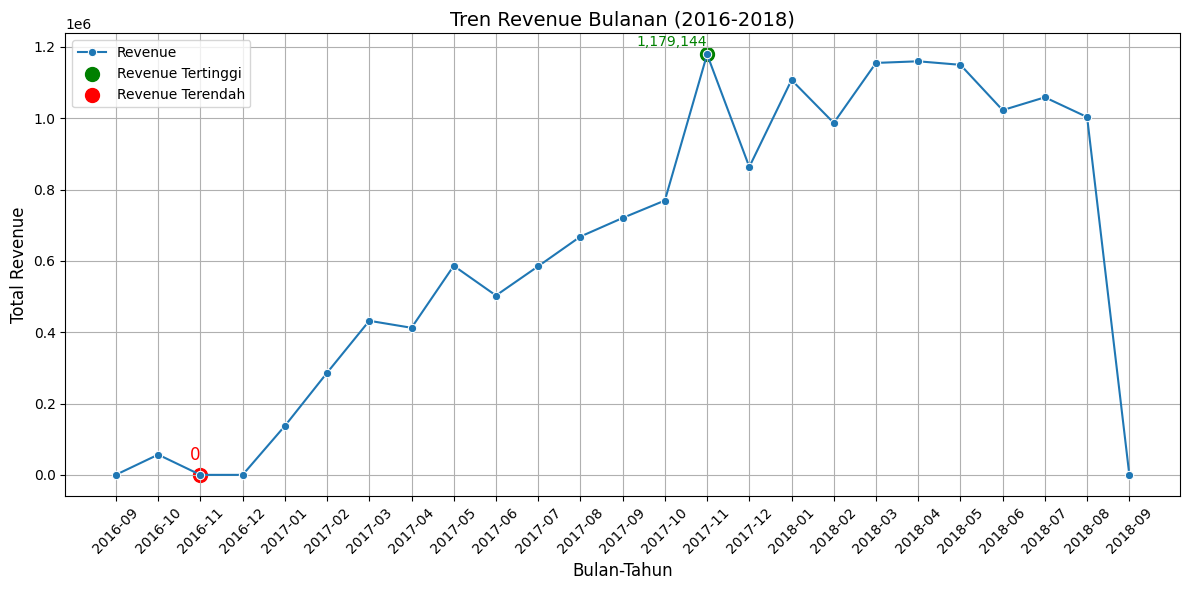

In [57]:
# Konversi 'month' ke string
monthly_orders_df['month'] = monthly_orders_df['month'].astype(str)

# Mencari nilai maksimum dan minimum
max_point = monthly_orders_df.loc[monthly_orders_df['revenue'].idxmax()]
min_point = monthly_orders_df.loc[monthly_orders_df['revenue'].idxmin()]

# Membuat grafik tren revenue bulanan
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_orders_df, x=monthly_orders_df['month'].astype(str), y='revenue', marker='o', label="Revenue")

# Highlight titik maksimum dan minimum
plt.scatter(max_point['month'], max_point['revenue'], color='green', s=100, label='Revenue Tertinggi')
plt.scatter(min_point['month'], min_point['revenue'], color='red', s=100, label='Revenue Terendah')

vertical_max = 15_000
vertical_min = 30_000

# Memberikan anotasi pada titik maksimum dan minimum
plt.text(max_point['month'], max_point['revenue'] + vertical_max, f"{max_point['revenue']:,.0f}",
         ha='right', va='bottom', fontsize=10, color='green')
plt.text(min_point['month'], min_point['revenue'] + vertical_min, f"{min_point['revenue']:,.0f}",
         ha='right', va='bottom', fontsize=12, color='red')

plt.xticks(rotation=45)
plt.title('Tren Revenue Bulanan (2016-2018)', fontsize=14)
plt.xlabel('Bulan-Tahun', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Tren Penjualan per Bulan

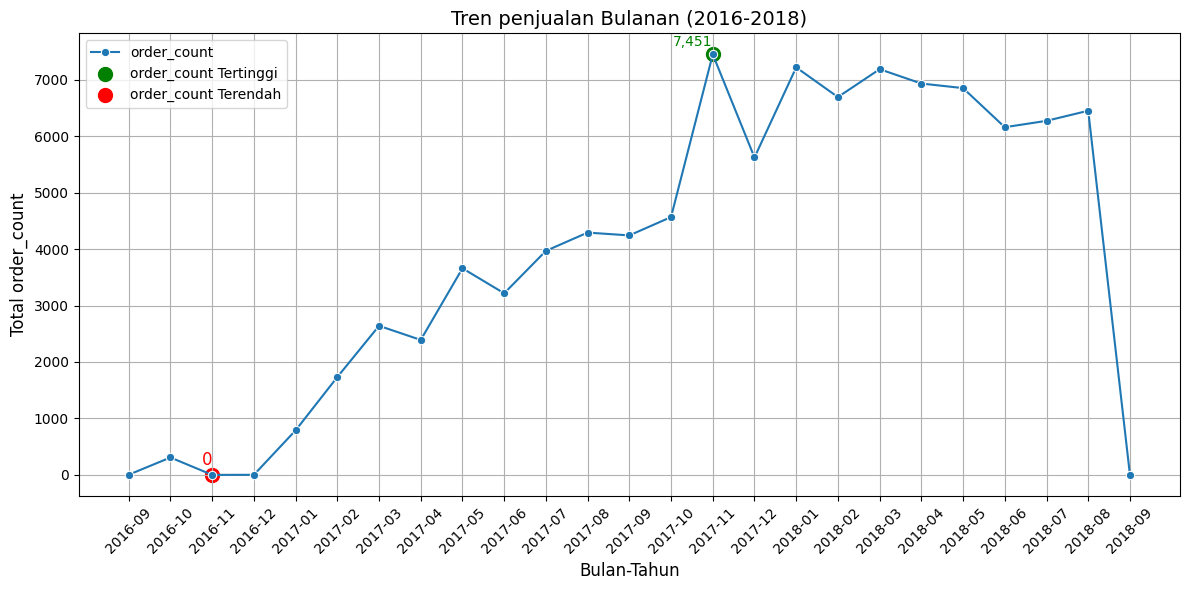

In [58]:
# Mencari nilai maksimum dan minimum
max_point_order = monthly_orders_df.loc[monthly_orders_df['order_count'].idxmax()]
min_point_order = monthly_orders_df.loc[monthly_orders_df['order_count'].idxmin()]

# Membuat grafik tren order_count bulanan
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_orders_df, x=monthly_orders_df['month'].astype(str), y='order_count', marker='o', label="order_count")

# Highlight titik maksimum dan minimum
plt.scatter(max_point_order['month'], max_point_order['order_count'], color='green', s=100, label='order_count Tertinggi')
plt.scatter(min_point_order['month'], min_point_order['order_count'], color='red', s=100, label='order_count Terendah')

vertical_max_order = 100
vertical_min_order = 100

# Memberikan anotasi pada titik maksimum dan minimum
plt.text(max_point_order['month'], max_point_order['order_count'] + vertical_max_order, f"{max_point_order['order_count']:,.0f}",
         ha='right', va='bottom', fontsize=10, color='green')
plt.text(min_point_order['month'], min_point_order['order_count'] + vertical_min_order, f"{min_point_order['order_count']:,.0f}",
         ha='right', va='bottom', fontsize=12, color='red')

plt.xticks(rotation=45)
plt.title('Tren penjualan Bulanan (2016-2018)', fontsize=14)
plt.xlabel('Bulan-Tahun', fontsize=12)
plt.ylabel('Total order_count', fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Bulan mana yang menunjukkan performa penjulaan tertinggi dan terendah ?:

<ipython-input-59-1ef486db3aab>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_orders_df, x=monthly_orders_df['month'].astype(str),


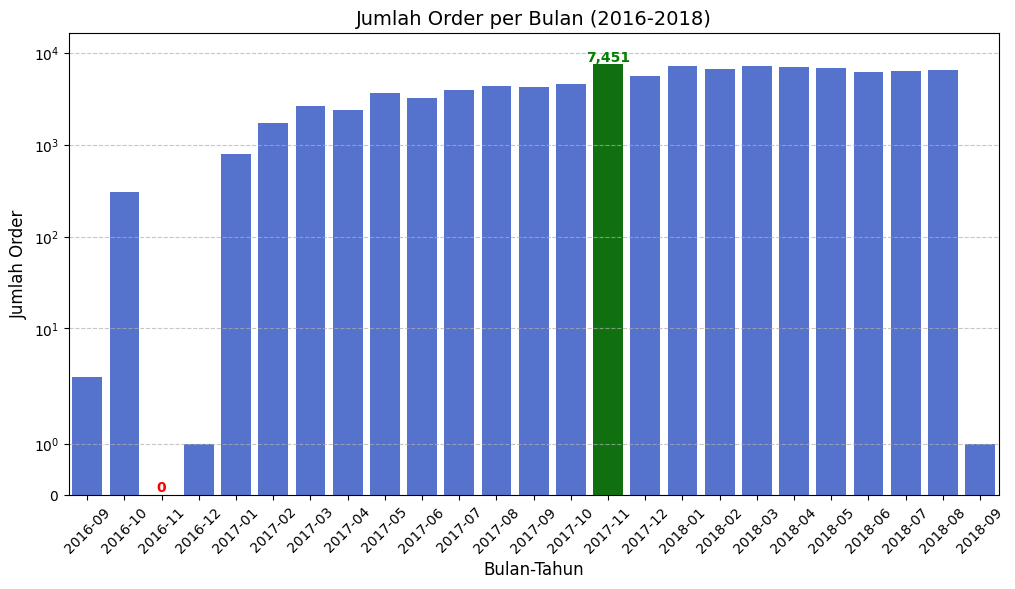

In [59]:
plt.figure(figsize=(12, 6))
colors = ['green' if x == max_point_order['order_count'] else
          'red' if x == min_point_order['order_count'] else
          'royalblue' for x in monthly_orders_df['order_count']]

sns.barplot(data=monthly_orders_df, x=monthly_orders_df['month'].astype(str),
            y='order_count', palette=colors)
plt.yscale('symlog')
plt.ylim(0, monthly_orders_df['order_count'].max() * 2.2)
plt.xticks(rotation=45)
plt.title('Jumlah Order per Bulan (2016-2018)', fontsize=14)
plt.xlabel('Bulan-Tahun', fontsize=12)
plt.ylabel('Jumlah Order', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan anotasi untuk titik maksimum & minimum
plt.text(max_point_order['month'], max_point_order['order_count'],
         f"{max_point_order['order_count']:,}", ha='center', va='bottom',
         fontsize=10, fontweight='bold', color='green')

plt.text(min_point_order['month'], min_point_order['order_count'],
         f"{min_point_order['order_count']:,}", ha='center', va='bottom',
         fontsize=10, fontweight='bold', color='red')

plt.show()


### Kategori produk yang paling diminati dan kurang diminati ? :

In [60]:
category_df = items_products_df.groupby(by="product_category_name_english")["product_id"].count().reset_index()
category_df = category_df.rename(columns={"product_category_name_english": "category", "product_id": "orders"})

<ipython-input-61-53a181778be1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="orders", y="category", data=category_df.sort_values(by="orders", ascending=False).head(5), palette=colors, ax=ax[0])
<ipython-input-61-53a181778be1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="orders", y="category", data=category_df.sort_values(by="orders", ascending=True).head(5), palette=colors, ax=ax[1])


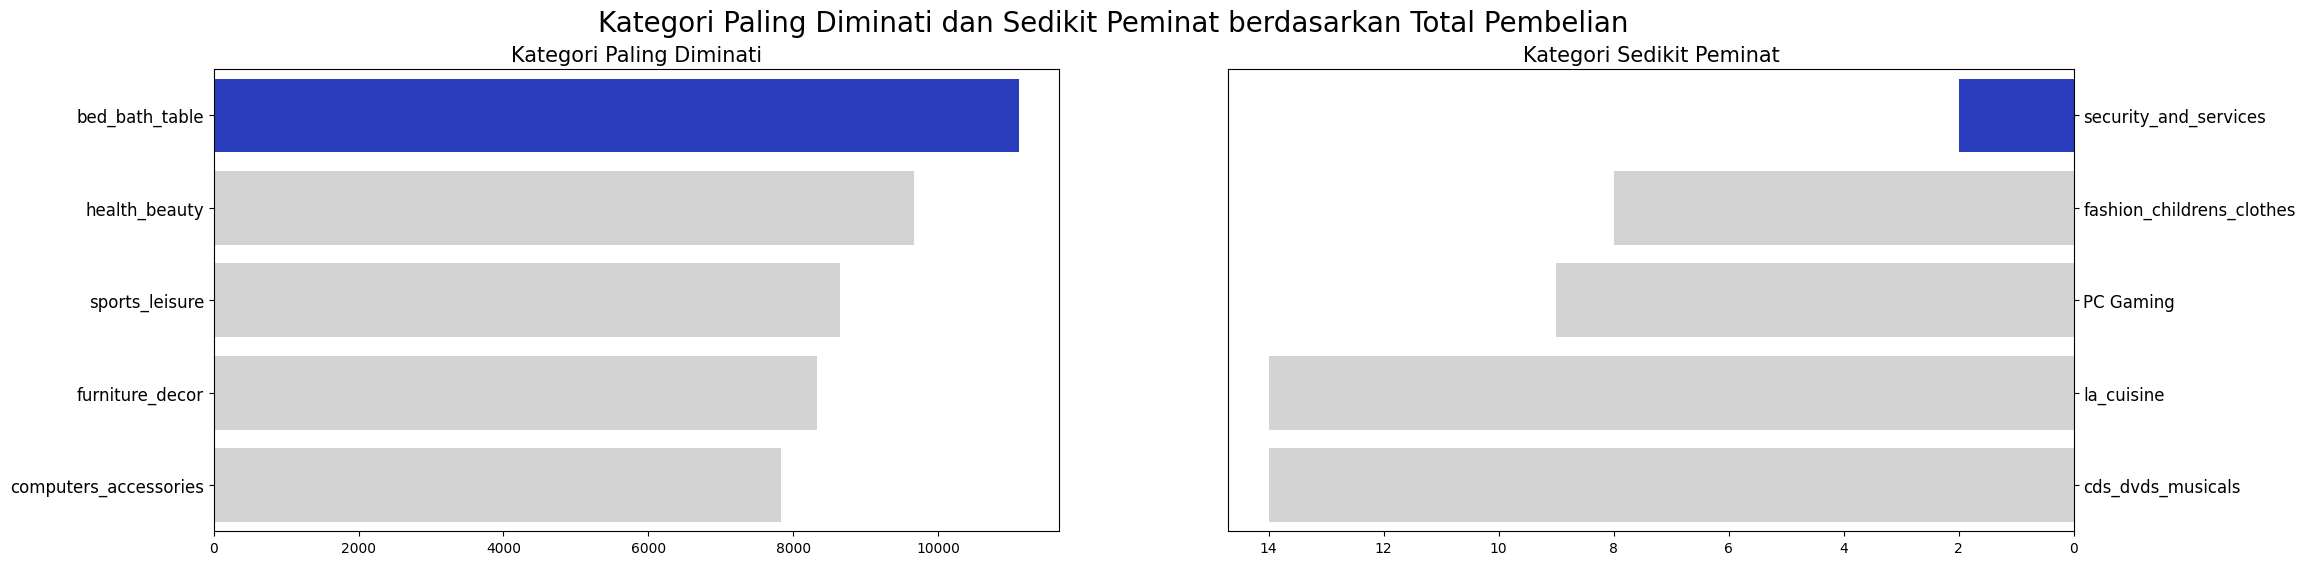

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#102cd4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="orders", y="category", data=category_df.sort_values(by="orders", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Kategori Paling Diminati", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="orders", y="category", data=category_df.sort_values(by="orders", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Kategori Sedikit Peminat", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Kategori Paling Diminati dan Sedikit Peminat berdasarkan Total Pembelian", fontsize=20)
plt.show()

### Menentukan pelanggan terbaik berdasarkan parameter rfm ? :

In [62]:
rfm_df = order_items_customers_df.groupby('customer_id', as_index= False).agg({
    'order_purchase_timestamp' : 'max',
    'order_item_id': 'nunique',
    'total_order_value': 'sum'
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = order_items_customers_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293
1,000161a058600d5901f007fab4c27140,1,67.41,414
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552
3,0002414f95344307404f0ace7a26f1d5,1,179.35,383
4,000379cdec625522490c315e70c7a9fb,1,107.01,154


<ipython-input-63-e1c51c179f92>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="recency", y="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-63-e1c51c179f92>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="frequency", y="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-63-e1c51c179f92>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="monetary", y="customer_id", data=rfm_df.sort_values(by="

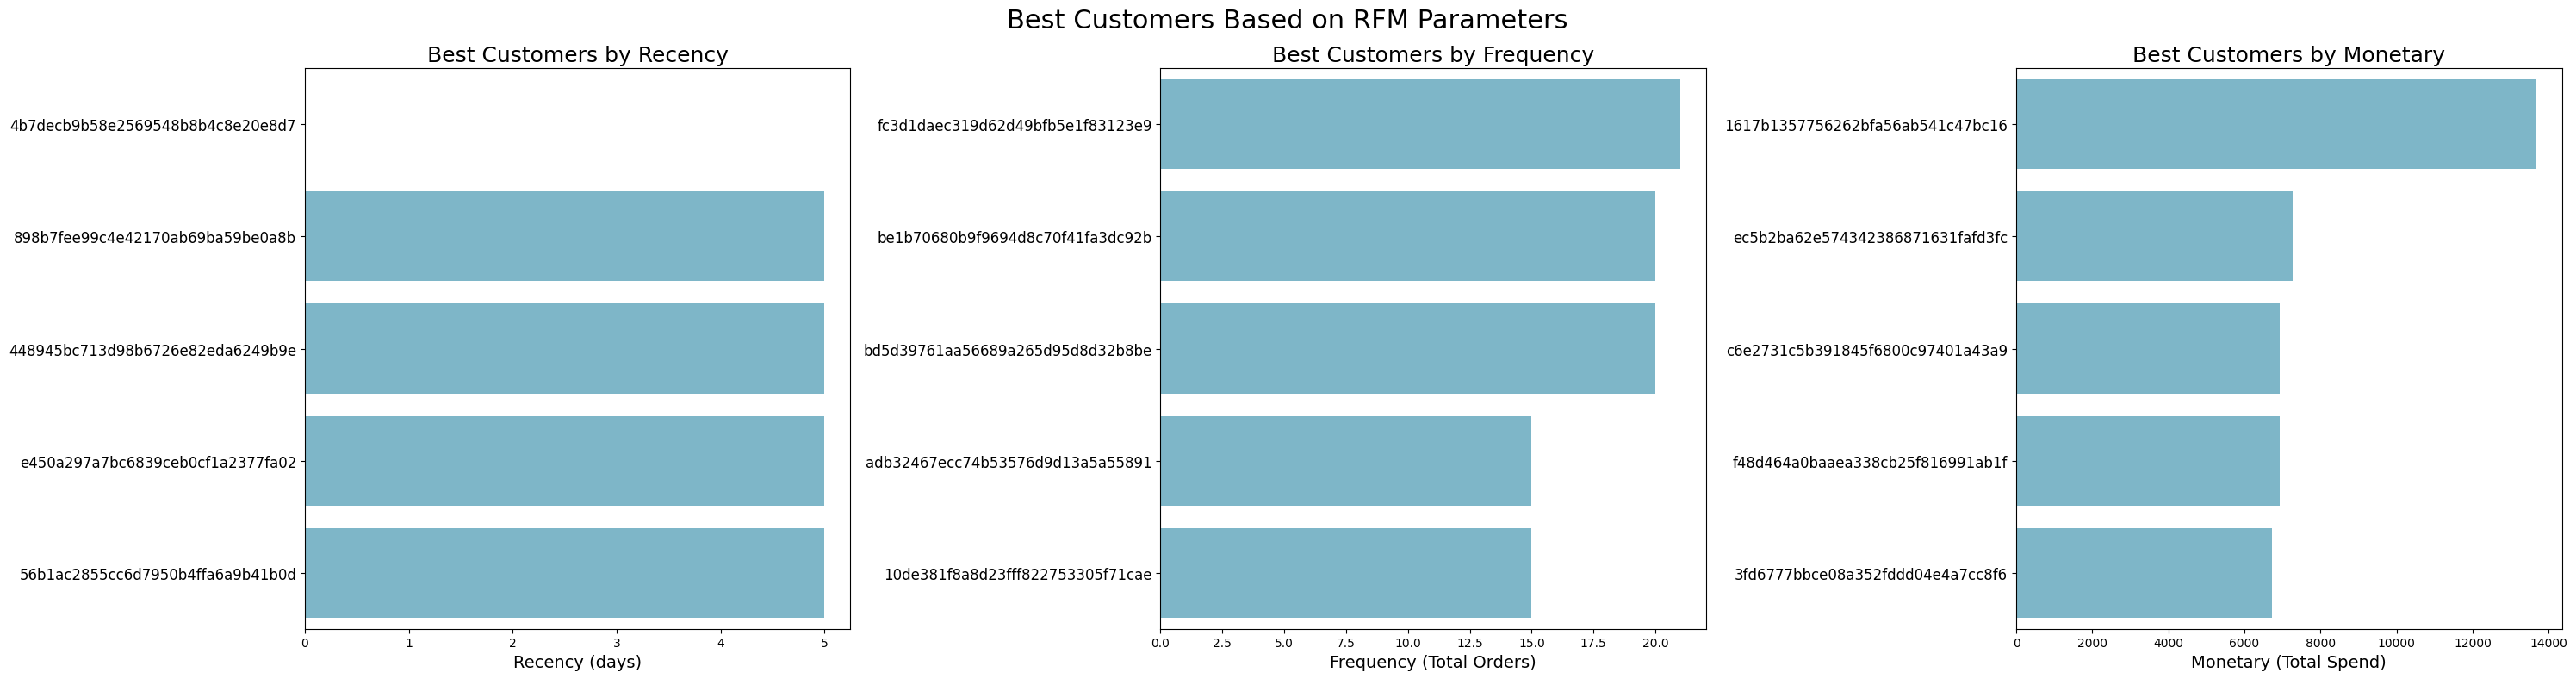

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# By Recency (lebih kecil lebih baik)
sns.barplot(x="recency", y="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_xlabel("Recency (days)", fontsize=14)
ax[0].set_ylabel(None)
ax[0].set_title("Best Customers by Recency", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=12)

# By Frequency (lebih besar lebih baik)
sns.barplot(x="frequency", y="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_xlabel("Frequency (Total Orders)", fontsize=14)
ax[1].set_ylabel(None)
ax[1].set_title("Best Customers by Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=12)

# By Monetary (lebih besar lebih baik)
sns.barplot(x="monetary", y="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_xlabel("Monetary (Total Spend)", fontsize=14)
ax[2].set_ylabel(None)
ax[2].set_title("Best Customers by Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='y', labelsize=12)

plt.suptitle("Best Customers Based on RFM Parameters", fontsize=22)
plt.tight_layout()
plt.show()


**Insight:**
- 5 pelanggan teratas by recenc
- Frequency : 5 pelanggan terbaik berdasarkan parameter frequency telah melakukan pembelian berturut - turut dari yang terbaik sebanyak 21, 20, 20, 15, 15
- Monetary : 5 pelanggan terbaik berdasarkan parameter monetary jumlah revenue yang dihasilkan dari pelanggan tersebut paling banyak sebesar 13664.08 dan paling sedikit 6726.66

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
> Selama 1 tahun tren cenderung positif dimulai pada bulan Desember 2016 hingga mengalami titik maksimal pada bulan November 2017 dimana revenue yang dihasilkan sebesar 1.179.144 dan 7.451 total orderan


- Conclution pertanyaan 2
> Bulan November tahun 2017 menunjukkan performa tertinggi dimana revenue yang dihasilkan sebesar 1.179.144 dan 7.451 total orderan

- Conclusion pertanyaan 3
> Produk kategori bed_bath_table merupakan produk yang paling banyak dibeli dengan jumlah pembelian sebanyak 11115 pcs, sedangkan produk kategori security_and_services yang kurang diminati dengan jumlah pembelian sebanyak 2 pcs

- Conclusion pertanyaan 4
> -  Recency : 5 pelanggan terbaik berdasarkan parameter recency semua waktu pembeliannya dibawah 6 hari (dihitung dari waktu terakhir pembelian)
  - Frequency : 5 pelanggan terbaik berdasarkan parameter frequency telah melakukan pembelian berturut - turut dari yang terbaik sebanyak 21, 20, 20, 15, 15
  - Monetary : 5 pelanggan terbaik berdasarkan parameter monetary jumlah revenue yang dihasilkan dari pelanggan tersebut paling banyak sebesar 13664.08 dan paling sedikit 6726.66

In [64]:
all_df.to_csv("all_data.csv", index=False)